In [2]:
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter

In [3]:
sample_dict = {
    "0p0": "ytso_0_try6_retry12",
    "0p2": "ytso_0p2_try8_8_1_2_retry_6_optimal",
    "0p5": "ytso_0p5_try2_scale4_try23_LP_2",
    "0p8": "ytso_0p8_try2_scale4_try3_optimal",
    "1p0": "ytso_1p0_try2_scale2_FSOnly_Optimal"
}

line_style = {
    "0p0": '-',
    "0p2": '-',
    "0p5": '-',
    "0p8": '-',
    "1p0": '-'
}

color_dict = {
    "0p0": 'red',
    "0p2": 'peru',
    "0p5": 'orange',
    "0p8": 'olivedrab',
    "1p0": 'violet'
}

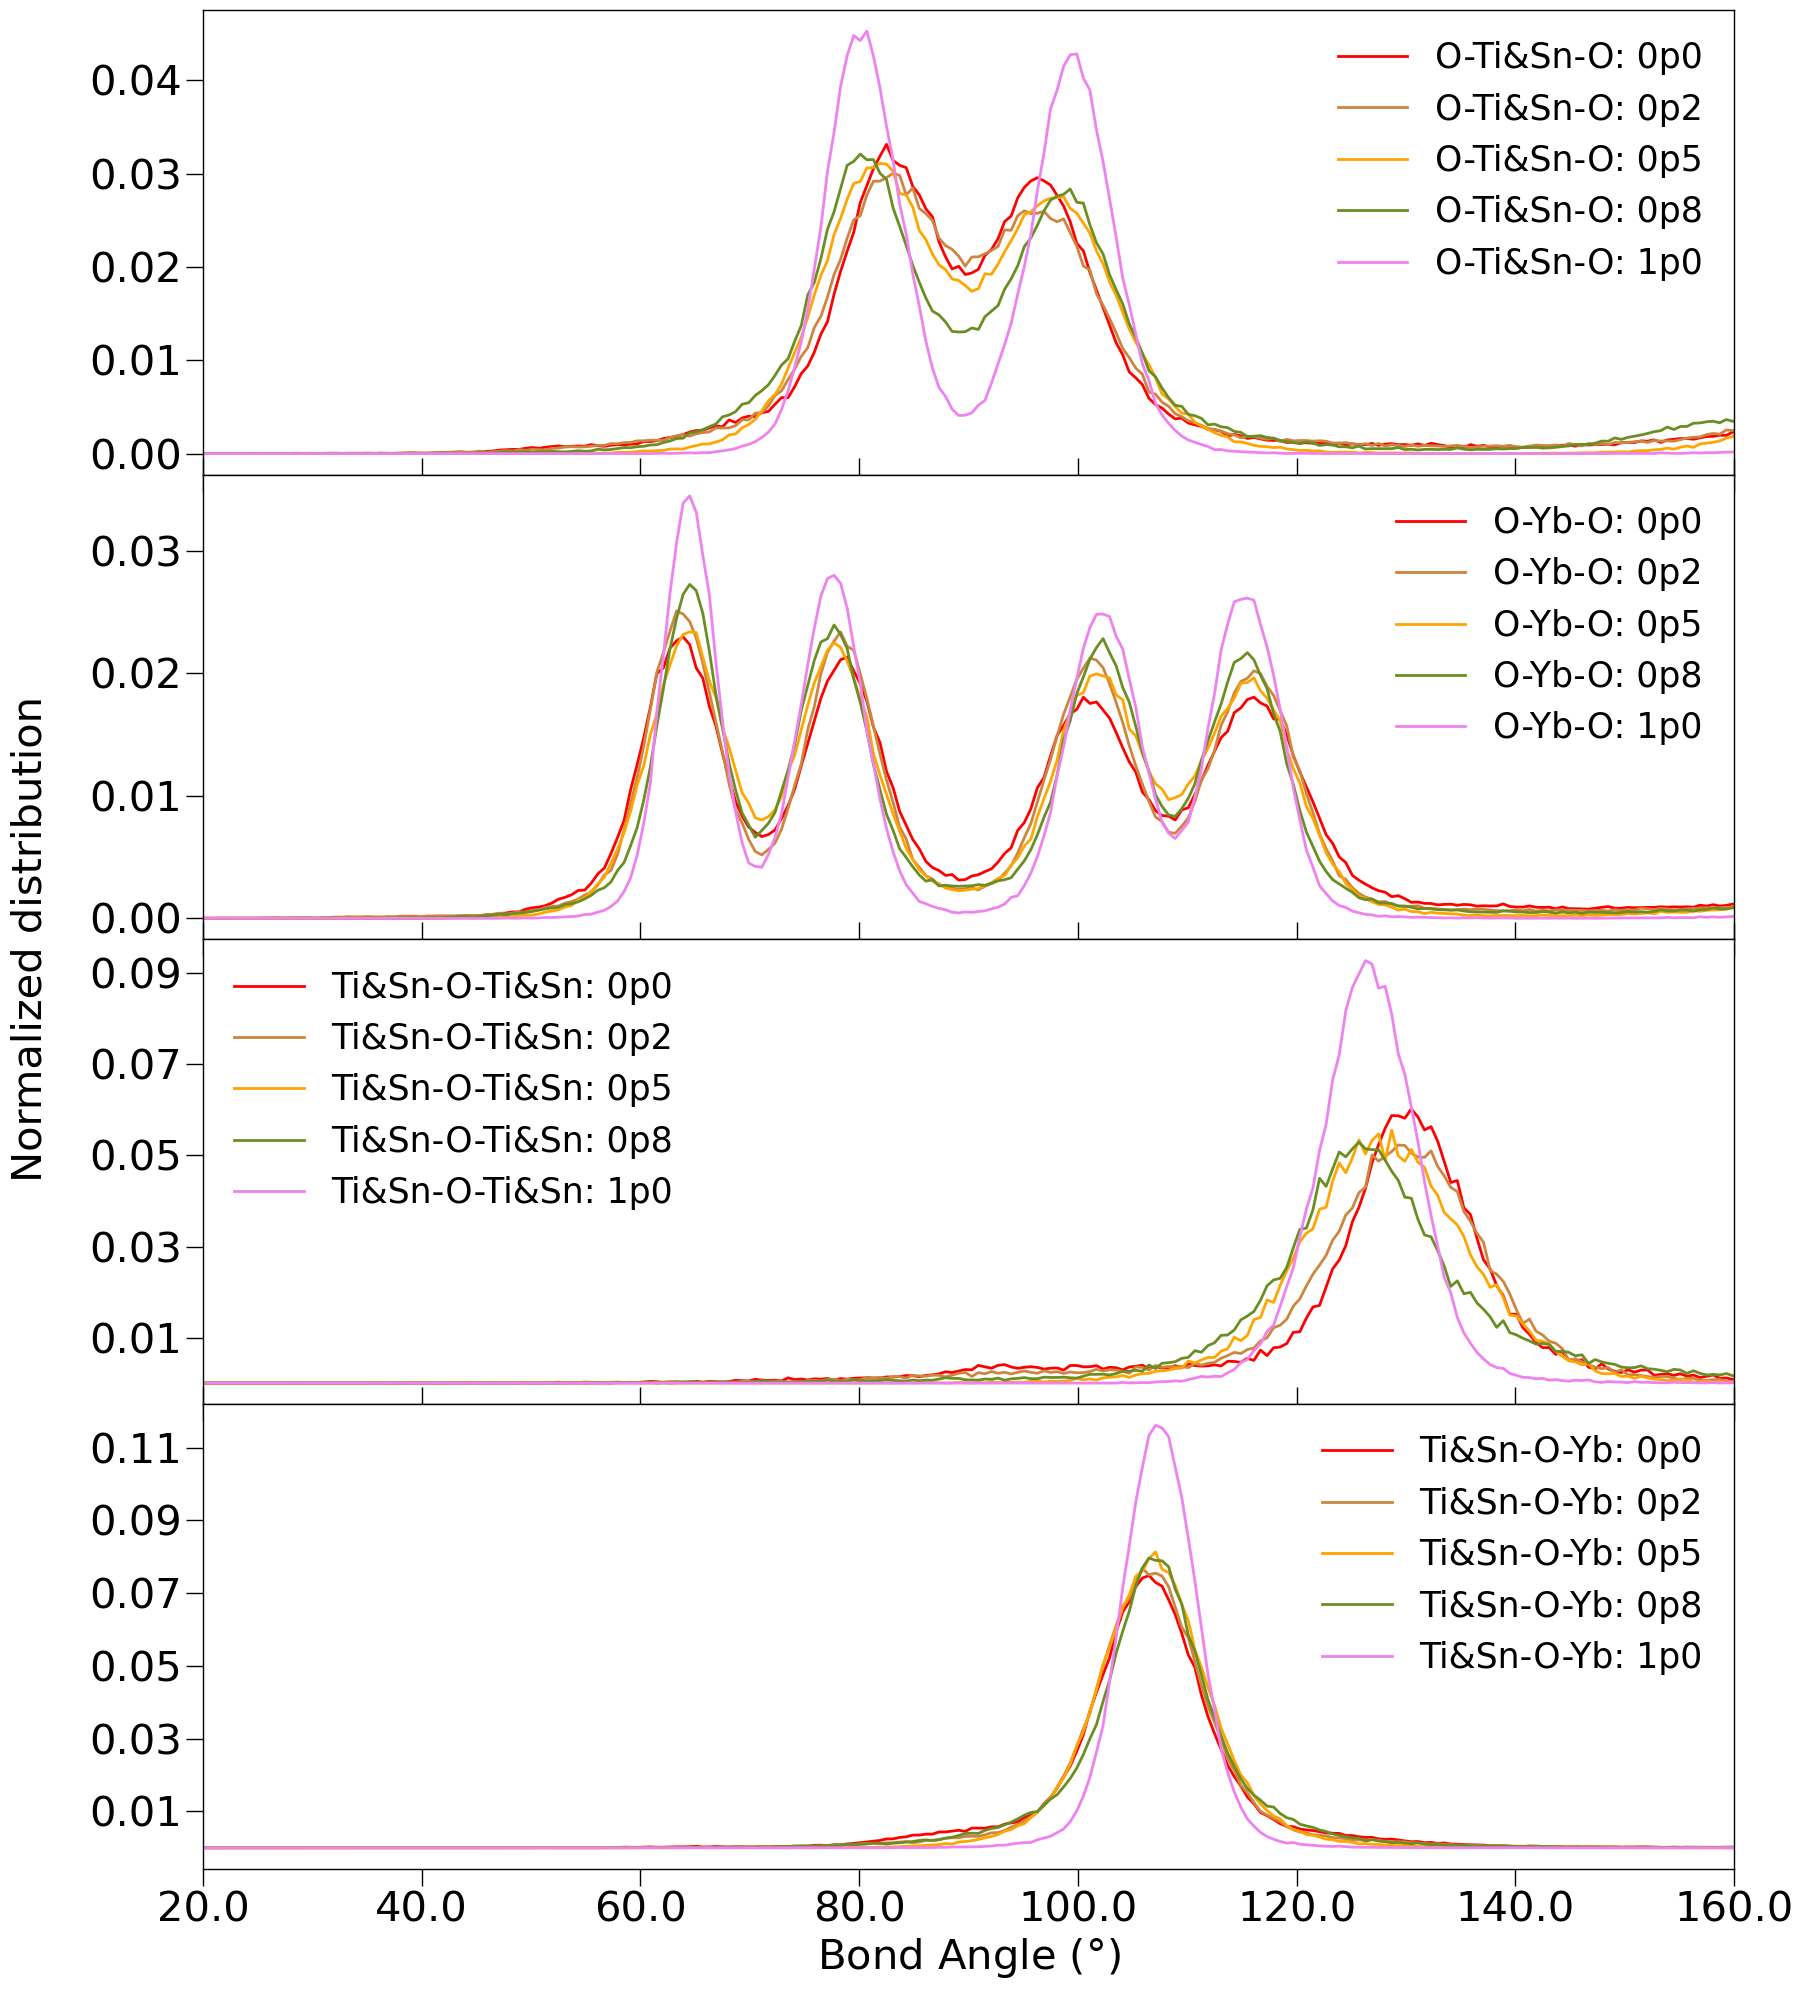

In [7]:
f = plt.figure(figsize=(18, 20))
gs = gridspec.GridSpec(4, 1, height_ratios=[1 for _ in range(4)], hspace=0)
axes = list()
for i in range(4):
    axes.append(plt.subplot(gs[i, 0]))

for key, item in sample_dict.items():
    with open(os.path.join(item, "ytso_0_triplets_all.hist"), "r") as file_in:
        for _ in range(6):
            line = file_in.readline()
        while line:
            line = file_in.readline()
            if line:
                if "b323" in line:
                    for _ in range(3):
                        line = file_in.readline()
                    b323_angle = []
                    b323_norm = []
                    for _ in range(300):
                        line = file_in.readline()
                        b323_angle.append(float(line.split()[0]))
                        b323_norm.append(float(line.split()[2]))
                if "b313" in line:
                    for _ in range(3):
                        line = file_in.readline()
                    b313_angle = []
                    b313_norm = []
                    for _ in range(300):
                        line = file_in.readline()
                        b313_angle.append(float(line.split()[0]))
                        b313_norm.append(float(line.split()[2]))
                if "b232" in line:
                    for _ in range(3):
                        line = file_in.readline()
                    b232_angle = []
                    b232_norm = []
                    for _ in range(300):
                        line = file_in.readline()
                        b232_angle.append(float(line.split()[0]))
                        b232_norm.append(float(line.split()[2]))
                if "b231" in line:
                    for _ in range(3):
                        line = file_in.readline()
                    b231_angle = []
                    b231_norm = []
                    for _ in range(300):
                        line = file_in.readline()
                        b231_angle.append(float(line.split()[0]))
                        b231_norm.append(float(line.split()[2]))

    angle_dict = {
        0: {
            "label": "O-Ti&Sn-O",
            "color": "red",
            "data": {"angle": b323_angle, "norm": b323_norm},
        },
        1: {
            "label": "O-Yb-O",
            "color": "peru",
            "data": {"angle": b313_angle, "norm": b313_norm},
        },
        2: {
            "label": "Ti&Sn-O-Ti&Sn",
            "color": "orange",
            "data": {"angle": b232_angle, "norm": b232_norm},
        },
        3: {
            "label": "Ti&Sn-O-Yb",
            "color": "olivedrab",
            "data": {"angle": b231_angle, "norm": b231_norm},
        },
    }

    for i in range(4):
        axes[i].plot(
            angle_dict[i]["data"]["angle"],
            angle_dict[i]["data"]["norm"],
            line_style[key],
            color=color_dict[key],
            label=angle_dict[i]["label"] + ": " + key,
            linewidth=2,
        )

        axes[i].set_xlim([20, 160])
        axes[i].tick_params(axis="x", direction="out", length=12, width=1, labelsize=30)
        if i != 3:
            axes[i].set_xticklabels([])
        if i > 0:
            axes[i].xaxis.set_ticks_position("both")
        axes[i].tick_params(axis="y", direction="out", length=12, width=1, labelsize=30)
        axes[i].spines["left"].set_linewidth(1)
        axes[i].spines["right"].set_linewidth(1)
        axes[i].spines["top"].set_linewidth(1)
        axes[i].spines["bottom"].set_linewidth(1)
        if i == 3:
            axes[i].set_xlabel(r"Bond Angle ($\degree$)", fontdict={"size": 30})
        # axes[i].set_ylabel(r"$g(r)$", fontdict={'size': 30})
        axes[i].legend(fontsize=25, frameon=False)
        axes[i].yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
        if i == 3:
            axes[i].xaxis.set_major_formatter(FormatStrFormatter("%.1f"))

_ = axes[3].set_yticks([0.01, 0.03, 0.05, 0.07, 0.09, 0.11])
_ = axes[2].set_yticks([0.01, 0.03, 0.05, 0.07, 0.09])
_ = axes[1].set_yticks([0.0, 0.01, 0.02, 0.03])
axes[1].set_ylabel(r"Normalized distribution", fontdict={"size": 30})
axes[1].yaxis.set_label_coords(-0.10, 0.0)
plt.tight_layout()
_ = f.savefig('triplets_all.png', format='png', dpi=600)